In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import make_scorer,precision_score,precision_recall_curve,plot_precision_recall_curve,plot_roc_curve,roc_curve,precision_score
from sklearn.inspection import permutation_importance
import warnings 
warnings.filterwarnings('ignore')
import pickle

In [47]:
data=pd.read_csv('/healthcare-stroke/healthcare-dataset-stroke-data.csv')

# EXPLORATORY DATA ANALYSIS & VISUALIZATION


In [48]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [49]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [50]:
data.shape

(5110, 12)

* we have 5110 row with 12 col

In [51]:
data.info() #check Count & Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
data.isnull().sum() #check for null values in data 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [53]:
data.duplicated().value_counts() #check duplicate values

False    5110
dtype: int64

In [54]:
data.describe().T #Statistical summary

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<AxesSubplot: >

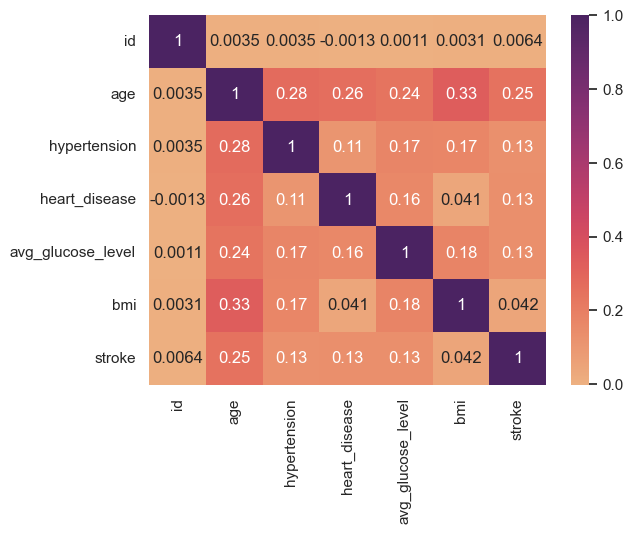

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='flare')
#checK the correlation among variables using heatmap

## Data Cleaning

In [56]:
data[['gender','id']].groupby(['gender']).count() 
#counts num of gender & Know their type

,id
gender,
Female,2994
Male,2115
Other,1


In [13]:
data=data[data['gender']!='Other'] # show data without gender['other']
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
#calc mean & median to fall null value 
print(data['bmi'].mean()) 
print(data['bmi'].median())


28.894559902200488
28.1


In [15]:
bmi_mean=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(bmi_mean)

In [16]:
#check if any null value was found or not 
data['bmi'].isnull().sum()

0

In [17]:
data=data.drop(['id'],axis=1)
data.shape

(5109, 11)

In [18]:
df=data.copy()

<AxesSubplot: >

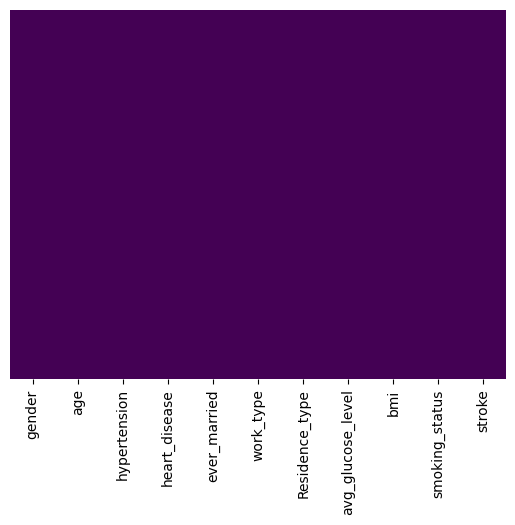

In [19]:
#check agein if any null value was found in any col
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

## Examination of Var & Target Var

In [20]:
def cat_summ(dataframe,col_name,plots=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts()
                        ,
                        'Ratio':
                            round(100*(dataframe[col_name].value_counts())/len(dataframe),2)}))
    
    if plots:
        sns.countplot(x=col_name,data=dataframe)
        plt.show

   stroke  Ratio
0    4860  95.13
1     249   4.87


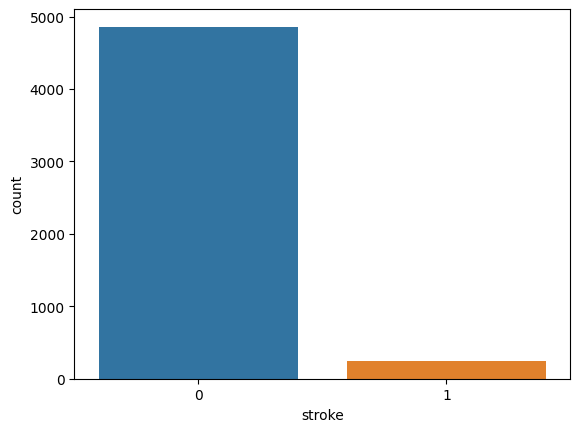

In [21]:
cat_summ(df,'stroke',plots=True)

        gender  Ratio
Female    2994   58.6
Male      2115   41.4


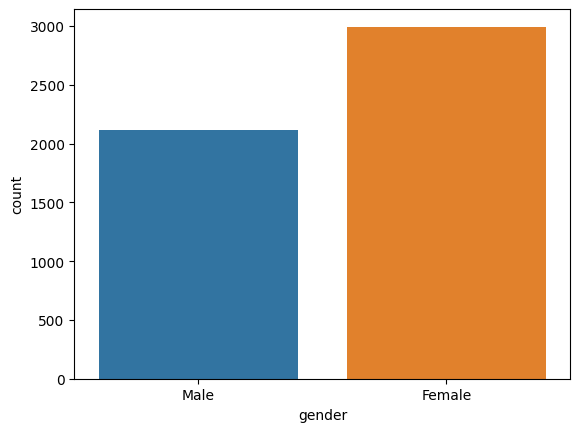

In [22]:
cat_summ(df,'gender',plots=True)

In [24]:
cate_col = ['gender' , 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type' ,'smoking_status' ]

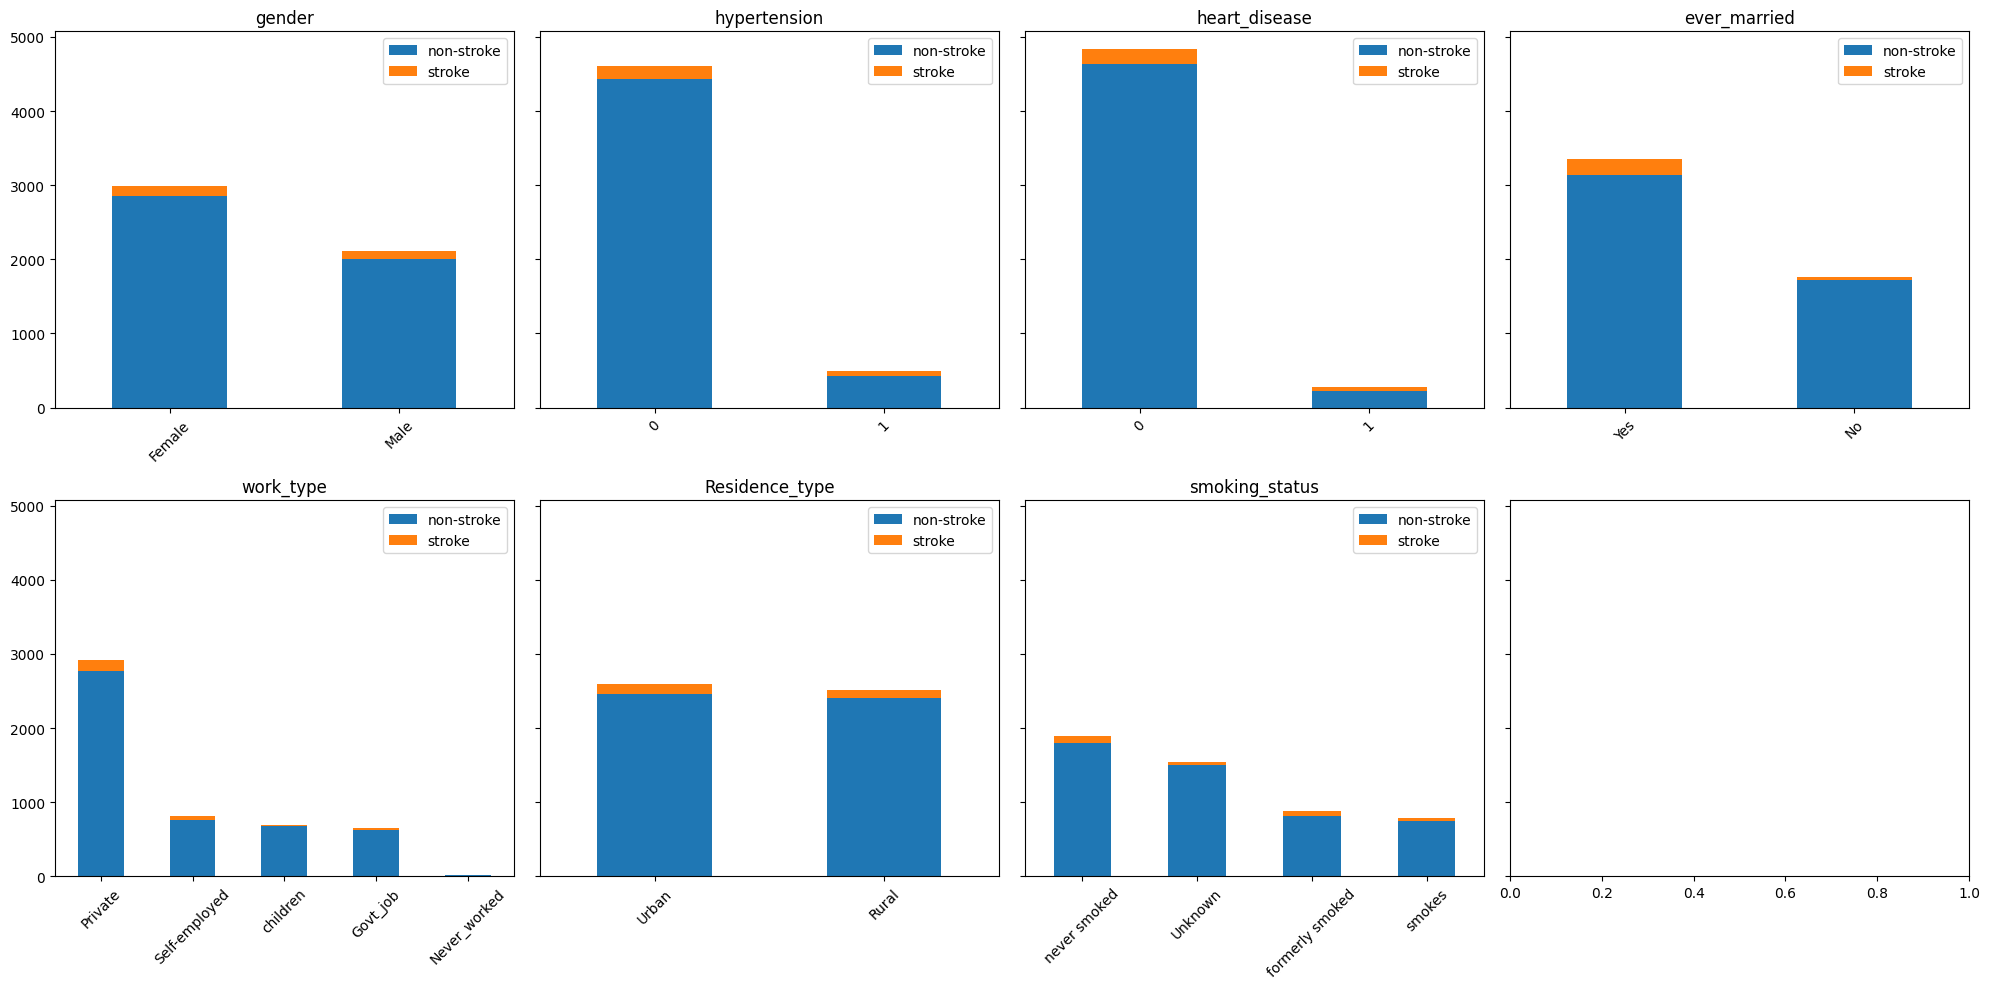

In [25]:
fig ,axs= plt.subplots(nrows=2 , ncols=4 , figsize=(20,10) , sharey=True)
axs = axs.ravel()

for index , col in enumerate(cate_col) :
    df_stroke_0 = pd.DataFrame(df[df['stroke'] == 0][col].value_counts()).rename(columns={col : 'non-stroke'})
    df_stroke_1 = pd.DataFrame(df[df['stroke'] == 1][col].value_counts()).rename(columns={col : 'stroke'})
    
    df_final = df_stroke_0.copy()
    df_final['stroke'] = df_stroke_1['stroke']
    df_final.plot(kind='bar' , stacked=True , ax=axs[index])
    
    axs[index].set_title(col)
    axs[index].tick_params('x' ,labelrotation=45)

plt.tight_layout()    

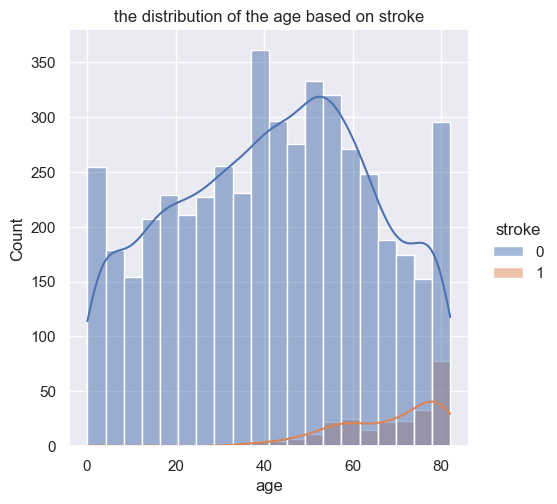

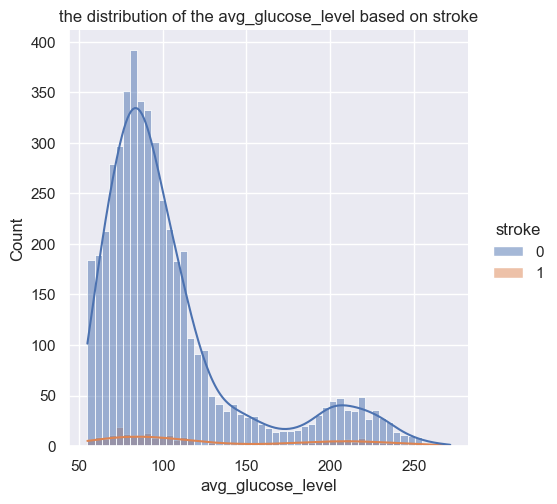

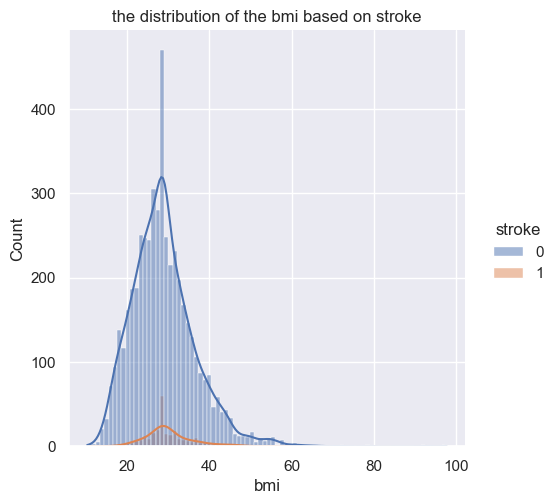

In [26]:
# a short look into the number of each cate features grouped by stroke var
sns.set_theme(style='darkgrid')
for i in df.columns[:-1]:
    if df[i].dtype=='float64':
        sns.displot(data=df,x=i,hue ='stroke',kde=True)
        plt.title('the distribution of the {} based on stroke'.format(i))
        plt.show()

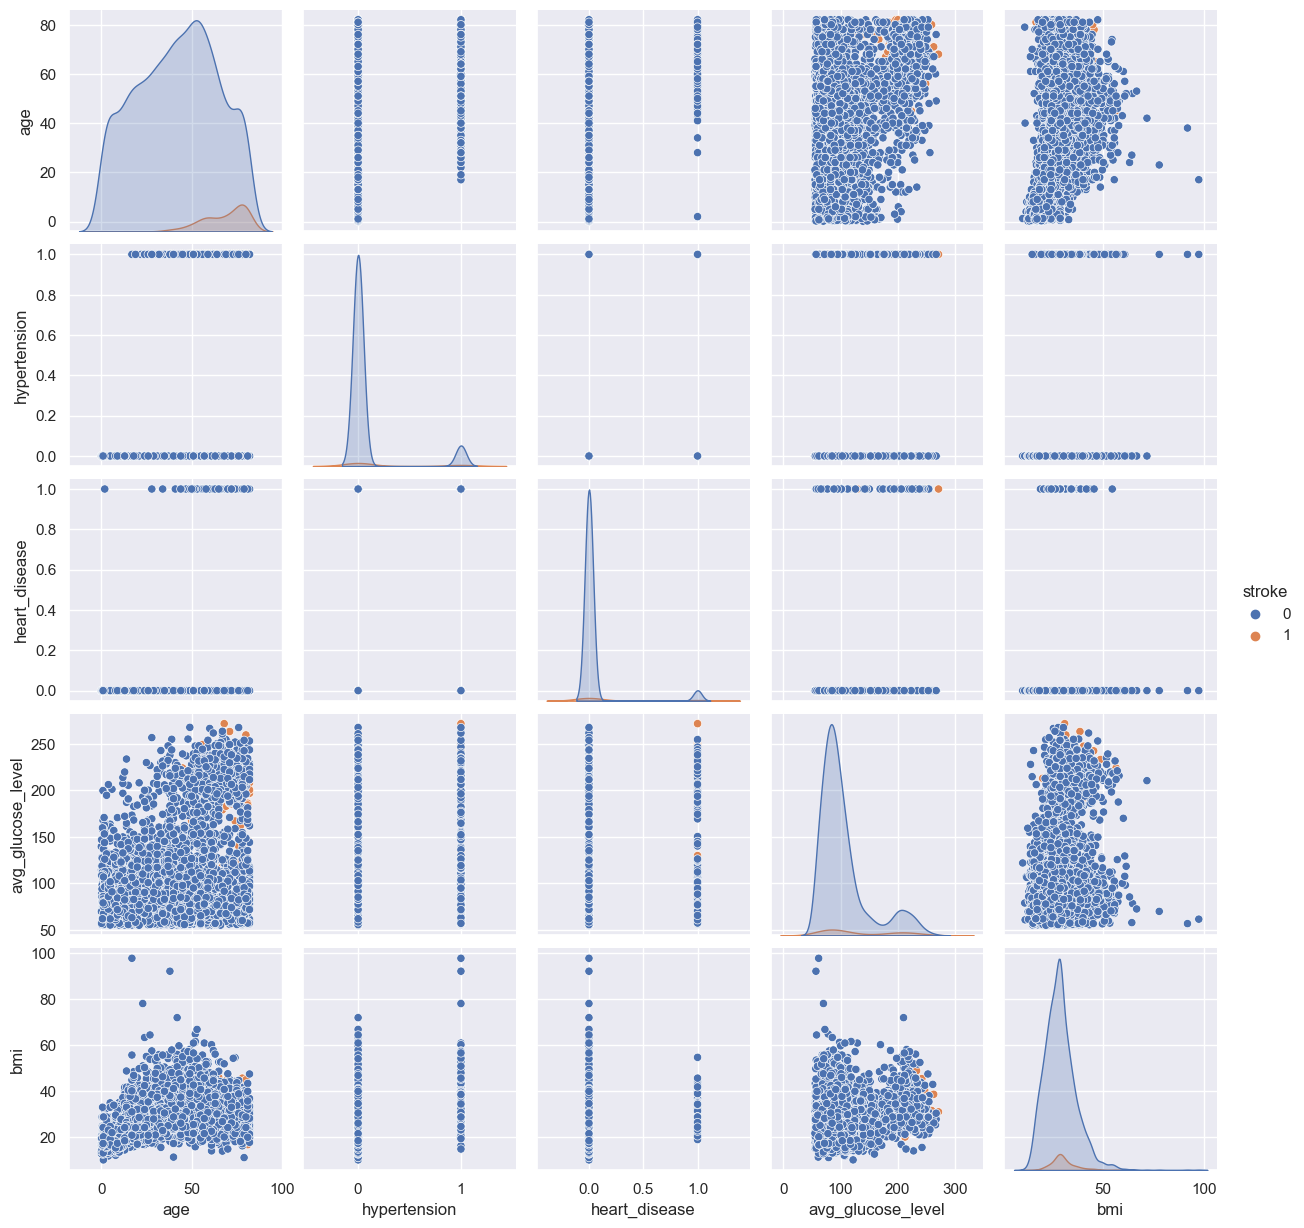

In [27]:
# Overall plot comparing all independant variable with dependant
sns.pairplot(df,hue="stroke")

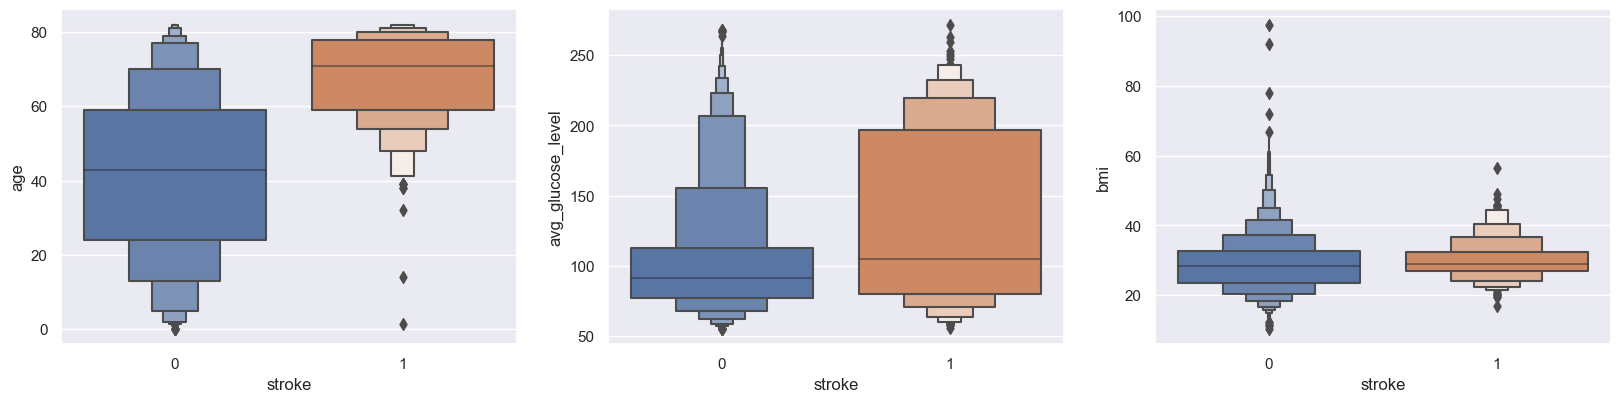

In [28]:
index=0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']).columns:
    if feature !='stroke':
        index +=1
        plt.subplot(4,3,index)
        sns.boxenplot(x='stroke',y=feature,data=df)

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot: >

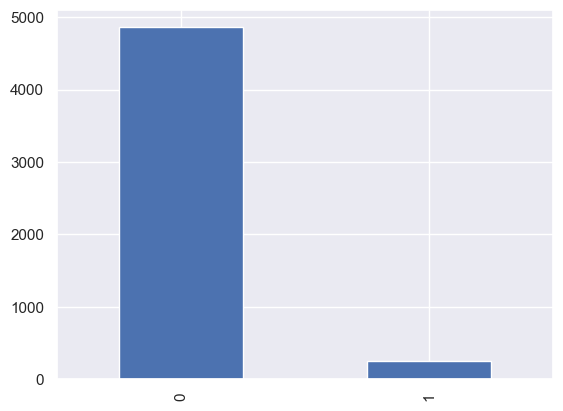

In [29]:
indexAge = data[((df['bmi'] > 50) & (df['stroke'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] > 40) & (df['stroke'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] < 19) & (df['stroke'] == 1)) ].index
indexAge.shape
data.drop(indexAge , inplace=True)

print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

# Prediction Model Building

* We are creating a Machine Learning Model using Loigistic Regression

In [30]:
df.shape

(5109, 11)

In [31]:
#now we should convert cate var into Numeric
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()  

df['gender'] = lb.fit_transform(df['gender'])
df['ever_married'] = lb.fit_transform(df['ever_married'])
df['work_type'] = lb.fit_transform(df['work_type'])
df['Residence_type'] = lb.fit_transform(df['Residence_type'])
df['smoking_status'] = lb.fit_transform(df['smoking_status'])
df['stroke'] = lb.fit_transform(df['stroke'])
df.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60000,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.20000,0,0


In [32]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1


In [33]:
X=df.drop('stroke',axis='columns') #extract features
y=df['stroke']#target var

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
#now Split dataset into train & test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Shape of training data", X_train.shape, y_train.shape)
print("Shape of testing data", X_test.shape, y_test.shape)

Shape of training data (4087, 10) (4087,)
Shape of testing data (1022, 10) (1022,)


* While using such data to train a machine-level model may result in accuracy, other accuracy measures such as precision and recall are inadequate

 * If such an unbalanced data is not dealt with properly, the findings will be inaccurate, and the forecast will be ineffective. As a result 

* to obtain an efficient model, this unbalanced data must be dealt with first. ‘‘The SMOTE technique’’ was employed for this purpose.bold text

In [36]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
X_test,y_test=smote.fit_resample(X_test,y_test)

* now we balanced our dataset by SMOTE

In [37]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(7776, 10) (7776,) (1944, 10) (1944,)


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
print('logistic regression model score',log_reg.score(X_test,y_test)*100)

logistic regression model score 78.96090534979425


In [39]:
#Acc on test data
X_test_pred=log_reg.predict(X_test)
test_acc=accuracy_score(X_test_pred,y_test)
print('Acc on data : ',test_acc*100)

Acc on data :  78.96090534979425


In [40]:
from sklearn.metrics import precision_score
print('Precsision: ',precision_score(y_test,X_test_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
#prec=TP/(TP+FP)
print('Recall : ',recall_score(y_test,X_test_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
#recall = TP/(TP+FN)

Precsision:  0.7580201649862511
Recall :  0.8508230452674898


## Counfusion matrix !!

we use this tool for summarizing preformance of classification algo 

* this give us clear pic of classification model preformance & type of errors produced by the model

[[708 264]
 [145 827]]


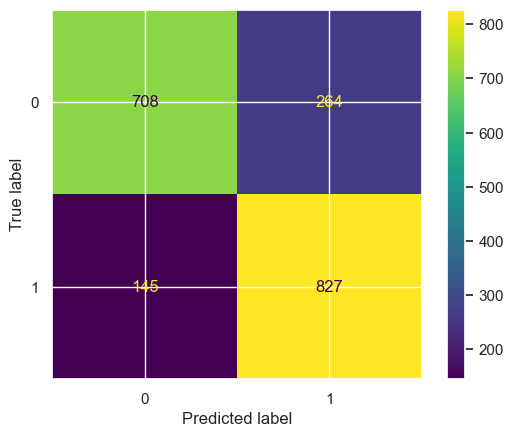

In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cf_mat=confusion_matrix(y_test,X_test_pred)
print(cf_mat)
plot_confusion_matrix(log_reg,X_test,y_test)
plt.show()

**ROC Curve (Receiver Operating Characteristic)**

* tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions.


X-axis is represent False positive rates (Specificity)  
Y-axis is represent True Positive Rate (Sensitivity)

* As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

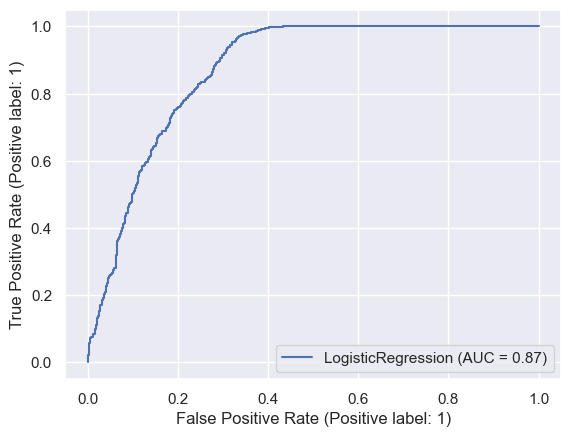

In [43]:
plot_roc_curve(log_reg,X_test,y_test)

In [44]:
log_reg.fit(X_train, y_train)  
# save the model to disk
filename = 'LOG_NUM2.sav'
pickle.dump(log_reg, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [93]:
# Input values for testing the model
input_data_1 = (0 ,	67.0 ,	0 ,	1 ,	1 ,	2 ,	1 ,	228.69 ,	36.60000 , 1) #strok
input_data_2 = (1 ,	51.0 ,	0 ,	0 ,	1 ,	2 ,	0 ,	166.29 ,	25.60000 ,	1)# non strok
#Change the input list to numpy array
input_data_numpy_array = np.asarray(input_data_2)
# Reshape the numpy array for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)
# Standardized the input data
std_data = sc.transform(input_data_reshaped)
# Prediction Result
prediction = log_reg.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print(' There is not stroke ')
else:
  print(' There is stroke ')

[1]
 There is stroke 


# Support Vector Machine (SVM)

In [73]:
sc=StandardScaler()
sc.fit(X_train)
x_train_std=sc.transform(X_train)
x_test_std=sc.transform(X_test)

In [74]:
from sklearn import svm
svc=svm.SVC (C=10,gamma=1000,probability=True , kernel='linear')
svc.fit(x_train_std,y_train)

SVC(C=10, gamma=1000, kernel='linear', probability=True)

In [75]:
y_pred=svc.predict(x_test_std)

from sklearn import metrics
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.802


In [76]:
print('precision : ',metrics.precision_score(y_test,y_pred))
print('recall : ',metrics.recall_score(y_test,y_pred))

precision :  0.7588028169014085
recall :  0.8868312757201646


[[698 274]
 [110 862]]


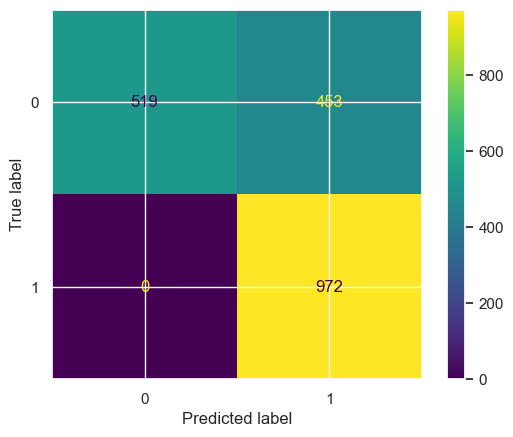

In [77]:
#Seaborn Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

ROC :  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000023E2F4FD6D0>


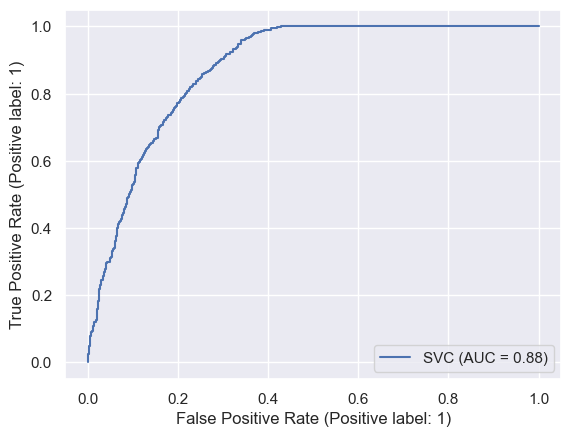

In [78]:
print('ROC : ',plot_roc_curve(svc,X_test,y_test))

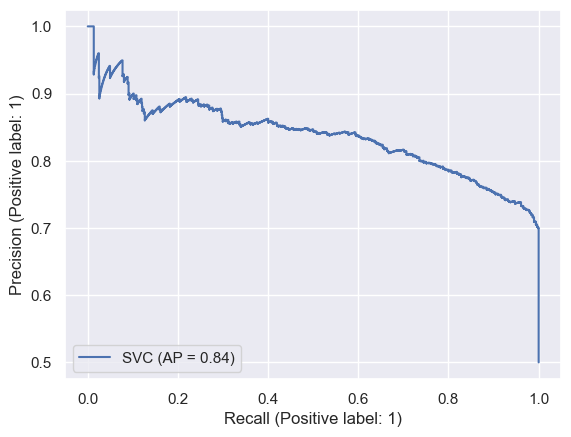

In [79]:
plot_precision_recall_curve(svc,X_test,y_test)

In [91]:
svc.fit(X_train, y_train)  
# save the model to disk
filename = 'SVM_NUM2.sav'
pickle.dump(svc, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
# Input values for testing the model
input_data_1 = (1 ,	67.0 ,	0 ,	1 ,	1 ,	2 ,	1 ,	228.69 ,	36.60000 , 1)# strok

input_data_2 = (1,	32.0 ,0,0,1,0,1,77.67 ,32.3 ,0)#Not strok
input_data_numpy_array = np.asarray(input_data_2)
input_data_reshaped = input_data_numpy_array.reshape(1,-1)
std_data = sc.transform(input_data_reshaped)
prediction = svc.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print(' There is not stroke ')
else: print(' There is stroke ')

[1]
 There is stroke 
